# AML - Group 1 - Assignment 1
## Predict the diagnosis (0: No, 1: Yes) 

- ABHIRAJ ANAND - 2020MT12283
- BANESH K SHENVI - 2020mt12373
- MADHUMITHA M - 2020mt12048
- SHETTY VISHAKA VISHWANATHA SHUBHA - 2020mt12034


1. Import the dataset from here: Breast cancer datasets. (1 Point)
2. Visualize the dataset using any two appropriate graphs. (2 points)
3. Visualize the correlation between all the variables of a dataset. (1  point)
4. Scale the dataset. (1 Point)
5. Split the data into a training set and testing set. (1 point).
6. Perform 10-fold cross-validation (1 point).
7. Train a Logistic regression model for the dataset. (1 point)
8. Compute the accuracy and confusion matrix. (2 points)
9. Plot the decision boundary, visualize training and test results. (2 points)

Steps in any Machine Learning classification problem
- Exploring the dataset
- Preprocessing the dataset and feature selection
- Splitting the dataset into training and testing set
- Building the model
- Evaluating the model

In [1]:
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline



#### 1. Import the dataset from here: Breast cancer datasets ( https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset )

In [2]:
df = pd.read_csv("Breast_cancer_data.csv", delimiter=",")

In [3]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


#### Checking the columns

In [4]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

### Data dictionary
- diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign)
- mean_radius: mean of distances from center to points on the perimeter
- mean_texture: standard deviation of gray-scale values
- mean_perimeter: mean size of the core tumor
- mean_area
- mean_smoothness: mean of local variation in radius lengths


---
**Check for missing/null values in a dataset**

In [5]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

We do not see any missing values. Most datasets that we work on will not be as clean as this one. **Data cleaning** is an important part of any problem in Data Science. Data Cleaning techniques would have employed had there been missing data or any other anamoly.

**Now, we will be looking at the distribution of classes( Malignant and Benign) in our dataset.**

In [6]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

### 2. Visualize the dataset using any two appropriate graphs.

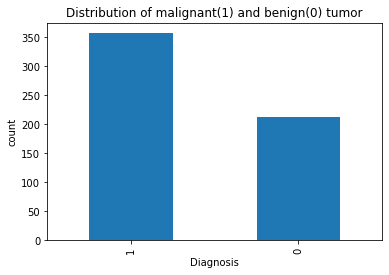

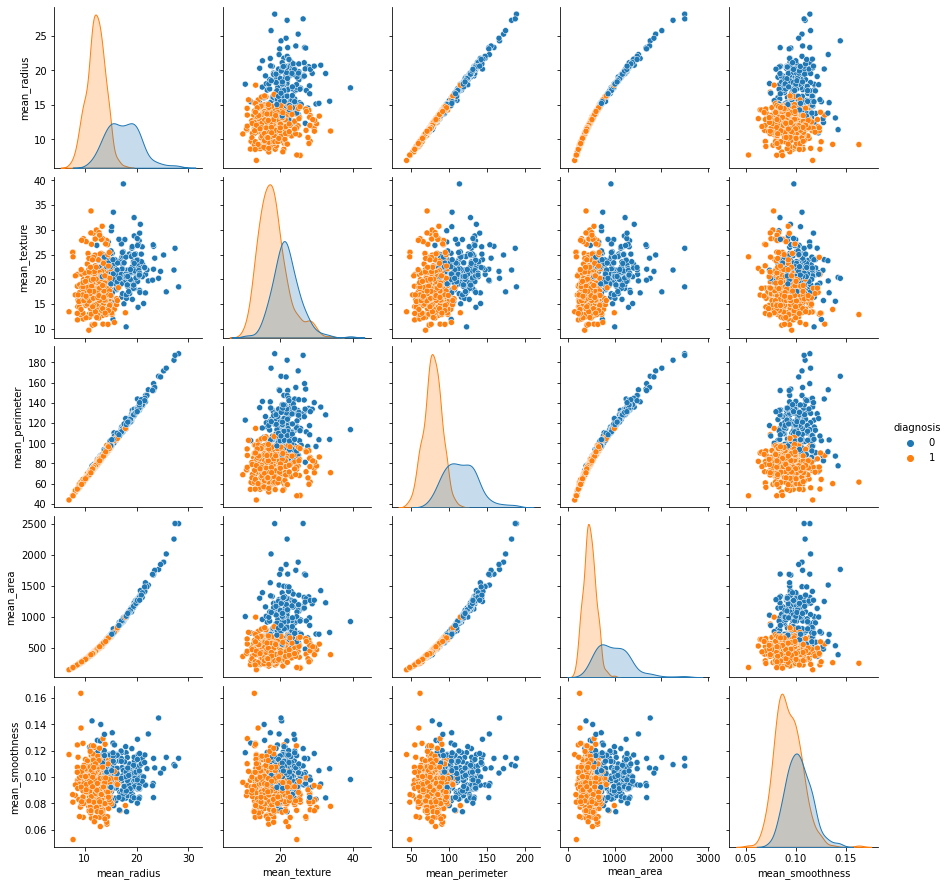

In [7]:
count.plot(kind='bar') ## Plot bar chart to visualize distribution of classes
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count");
sns.pairplot(df, hue='diagnosis', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness']) ## Plot pairwise relationships in a dataset
plt.show()

### 3. Visualize the correlation between all the variables of a dataset

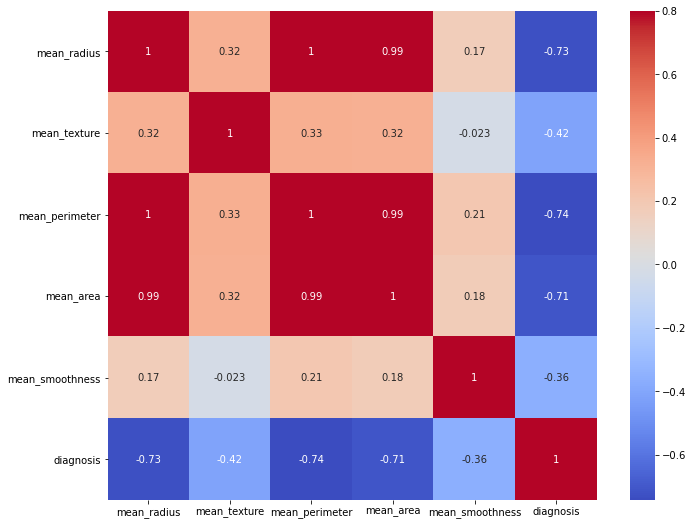

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="coolwarm", vmax=.8, square=True, annot= True);

---
### Target variable/ class
The main motive of our predictor is to correctly predict on the basis of the data available, if the breast cancer is 
- Malignant(1) i.e. Harmful ,or
- Benign(0) i.e. Not Harmful.

Hence, our target class is **Diagnosis**

In [9]:
y_target = df['diagnosis']

### Feature Selection

Now, among all the features available, we need to select the best set of features inorder to train our predictor. A typical dataset might have features ranging from 30 to even about 100 and more. In such a case, feature selection plays an important role in the accuracy of the prediction.

Let's see what features are available on our dataset.

In [10]:
df.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

**Let us now plot out the pairplot of different features to determine which features are better at classifying the 2 classes of our problem.**

In [11]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'}) # converting the data into categorical

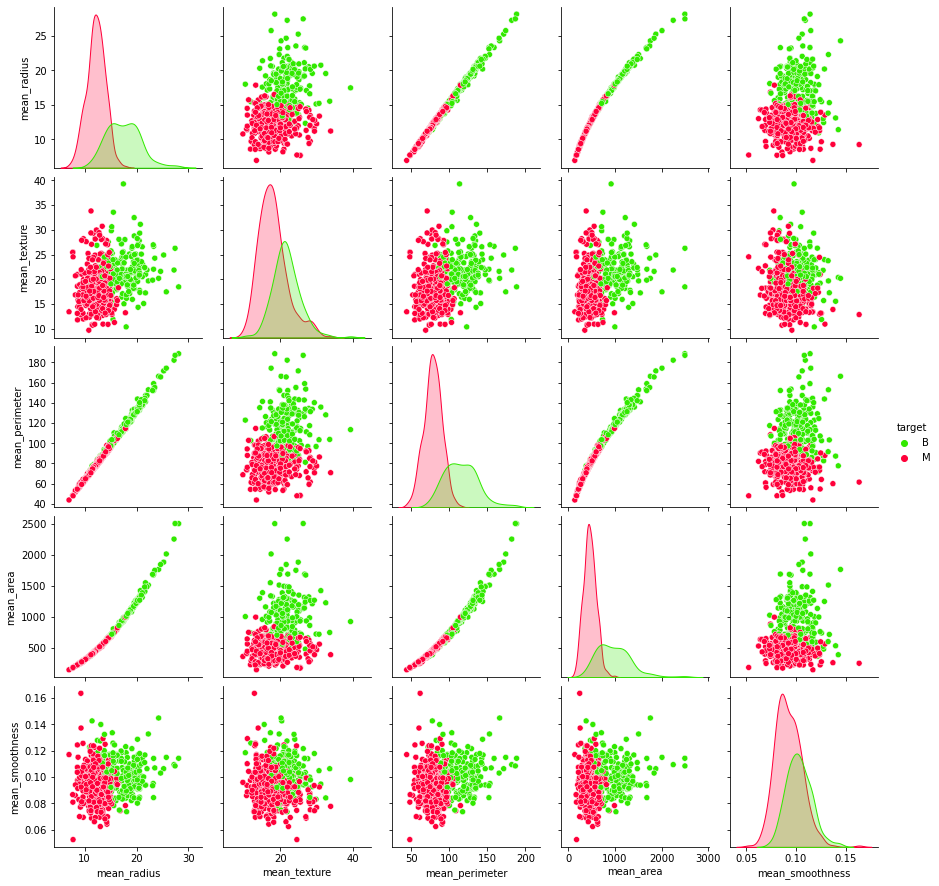

In [12]:
g = sns.pairplot(df.drop('diagnosis', axis = 1), hue="target", palette='prism');

**The features mean_perimeter and mean_texture seem to be most relevant**

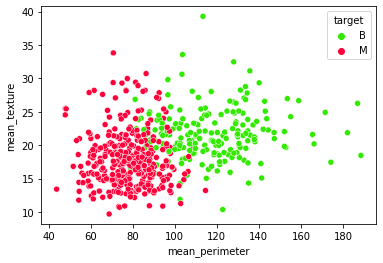

In [13]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = df, hue = 'target', palette='prism');

In [14]:
features = ['mean_perimeter', 'mean_texture']

In [15]:
X_feature = df[features]

**Taking all features**

In [16]:
# X_feature = df.drop(['target','diagnosis'], axis = 1)

### 5. Split the data into a training set and testing set.
We use Cross Validation to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data. So our classifier is first trained on the train set( usually 80% of the total data) and then tested on the test set( usually rest 20% of the data which the classifier has not seen) on the basis of which accuracy is computed.

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split


In [18]:
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.2, random_state = 42)

In [19]:
print(" Shape of x_train = ", X_train.shape)
print(" Shape of x_test = ", X_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (455, 2)
 Shape of x_test =  (114, 2)
 Shape of y_train =  (455,)
 Shape of y_test =  (114,)


### 4. Scale the dataset (Answer to Q 5 Above)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6. Perform 10-fold cross-validation.

In [21]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
model = linear_model.LogisticRegression()
# kfold = KFold(n_splits=10)
kfold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # used repeated K fold validation to reduce effect of noisy data
cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
print ("Accuracy score using Logistic Regression with 10-fold cross-validation:", cv_results.mean()*100, "%")

Accuracy score using Logistic Regression with 10-fold cross-validation: 88.57004830917874 %


### 7. Train a Logistic regression model for the dataset.
---
#### Binary classification using Logistic Regression

Logistic Regression is mostly used for binary classifications where the dependent variable(target) which are dichotomous in nature( yes or no). 

#### Data is trained to fit on the train set.

In [22]:
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
#pip install mlxtend

**Plotting decision boundaries for 2 features**

In [24]:
from mlxtend.plotting import plot_decision_regions

In [25]:
# !pip install mlxtend
type(X_train)

numpy.ndarray

In [26]:
type(y_train)

pandas.core.series.Series

In [27]:
y_train = y_train.to_numpy()

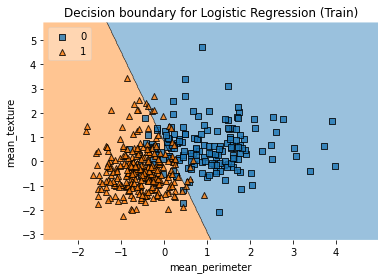

In [28]:
plot_decision_regions(X_train,y_train, clf=model, legend=2)
plt.title("Decision boundary for Logistic Regression (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

**Predictions are done on the Test set**

In [29]:
y_pred = model.predict(X_test)

### 8. Compute the accuracy and confusion matrix and 9. Plot the decision boundary, visualize training and test results


**Accuracy**

The predicted values and the actual test values are compared to compute the accuracy.

In [30]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)

Accuracy score using Logistic Regression: 92.98245614035088


In [33]:
y_test = y_test.to_numpy()

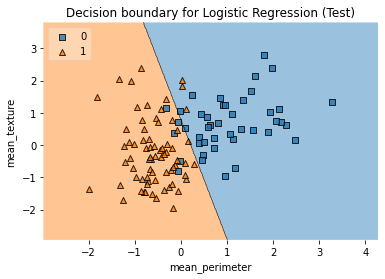

In [35]:
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.title("Decision boundary for Logistic Regression (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

**Confusion matrix**

<img src = "https://www.dataschool.io/content/images/2015/01/confusion_matrix2.png">

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
conf_mat = confusion_matrix(y_test, y_pred)

In [38]:
conf_mat


array([[38,  5],
       [ 3, 68]], dtype=int64)

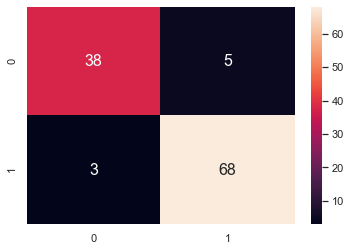

In [39]:
df_cm = pd.DataFrame(conf_mat, range(2), range(2))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

---
### Using another classiciation technique - Binary classification using K Nearest Neighbours(KNN)

KNN Algorithm is based on feature similarity, i.e how closely out-of-sample features resemble our training set determines how we classify a given data point.

<img src = "https://cdn-images-1.medium.com/max/800/0*Sk18h9op6uK9EpT8.">

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
clf = KNeighborsClassifier()

In [42]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = clf.predict(X_test)

In [44]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)

Accuracy score using KNN: 94.73684210526315


In [45]:
confusion_matrix(y_test, y_pred)

array([[40,  3],
       [ 3, 68]], dtype=int64)

**Plotting the decision boundaries using KNN**

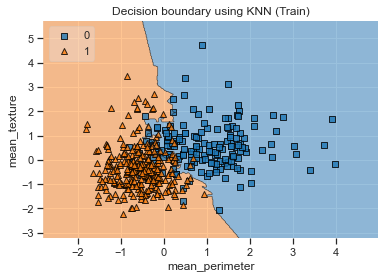

In [47]:
plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

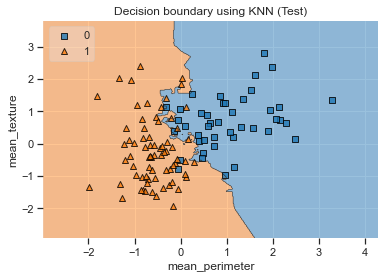

In [48]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");

### End of Assignment